
<a id='python-oop'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# OOP II: Building Classes


<a id='index-1'></a>

## Contents

- [OOP II: Building Classes](#OOP-II:-Building-Classes)  
  - [Overview](#Overview)  
  - [OOP Review](#OOP-Review)  
  - [Defining Your Own Classes](#Defining-Your-Own-Classes)  
  - [Special Methods](#Special-Methods)  
  - [Exercises](#Exercises)  

## Overview

In an [earlier lecture](https://python-programming.quantecon.org/oop_intro.html), we learned some foundations of object-oriented programming.

The objectives of this lecture are

- cover OOP in more depth  
- learn how to build our own objects, specialized to our needs  


For example, you already know how to

- create lists, strings and other Python objects  
- use their methods to modify their contents  


So imagine now you want to write a program with consumers, who can

- hold and spend cash  
- consume goods  
- work and earn cash  


A natural solution in Python would be to create consumers as objects with

- data, such as cash on hand  
- methods, such as `buy` or `work` that affect this data  


Python makes it easy to do this, by providing you with **class definitions**.

Classes are blueprints that help you build objects according to your own specifications.

It takes a little while to get used to the syntax so we’ll provide plenty of examples.

We’ll use the following imports:

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

## OOP Review

OOP is supported in many languages:

- JAVA and Ruby are relatively pure OOP.  
- Python supports both procedural and object-oriented programming.  
- Fortran and MATLAB are mainly procedural, some OOP recently tacked on.  
- C is a procedural language, while C++ is C with OOP added on top.  


Let’s cover general OOP concepts before we specialize to Python.

### Key Concepts


<a id='index-2'></a>
As discussed an [earlier lecture](https://python-programming.quantecon.org/oop_intro.html), in the OOP paradigm, data and functions are **bundled together** into “objects”.

An example is a Python list, which not only stores data but also knows how to sort itself, etc.

In [6]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

As we now know, `sort` is a function that is “part of” the list object — and hence called a *method*.

If we want to make our own types of objects we need to use class definitions.

A *class definition* is a blueprint for a particular class of objects (e.g., lists, strings or complex numbers).

It describes

- What kind of data the class stores  
- What methods it has for acting on these data  


An  *object* or *instance* is a realization of the class, created from the blueprint

- Each instance has its own unique data.  
- Methods set out in the class definition act on this (and other) data.  


In Python, the data and methods of an object are collectively referred to as *attributes*.

Attributes are accessed via “dotted attribute notation”

- `object_name.data`  
- `object_name.method_name()`  


In the example

In [7]:
x = [1, 5, 4]
x.sort()
x.__class__

list

- `x` is an object or instance, created from the definition for Python lists, but with its own particular data.  
- `x.sort()` and `x.__class__` are two attributes of `x`.  
- `dir(x)` can be used to view all the attributes of `x`.  



<a id='why-oop'></a>

### Why is OOP Useful?

OOP is useful for the same reason that abstraction is useful: for recognizing and exploiting the common structure.

For example,

- *a Markov chain* consists of a set of states, an initial probability distribution over states,  and a collection of probabilities of moving across states  
- *a general equilibrium theory* consists of a commodity space, preferences, technologies, and an equilibrium definition  
- *a game* consists of a list of players, lists of actions available to each player, each player’s payoffs as functions of all other players’ actions, and a timing protocol  


These are all abstractions that collect together “objects” of the same “type”.

Recognizing common structure allows us to employ common tools.

In economic theory, this might be a proposition that applies to all games of a certain type.

In Python, this might be a method that’s useful for all Markov chains (e.g., `simulate`).

When we use OOP, the `simulate` method is conveniently bundled together with the Markov chain object.

## Defining Your Own Classes


<a id='index-3'></a>
Let’s build some simple classes to start off.


<a id='oop-consumer-class'></a>
Before we do so, in order to indicate some of the power of Classes, we’ll define two functions that we’ll call `earn` and `spend`.

In [2]:
def earn(w,y):
    "Consumer with inital wealth w earns y"
    return w+y

def spend(w,x):
    "consumer with initial wealth w spends x"
    new_wealth = w -x
    if new_wealth < 0:
        print("Insufficient funds")
    else:
        return new_wealth

The `earn` function takes a consumer’s initial wealth $ w $ and  adds to it her current earnings $ y $.

The `spend` function takes a consumer’s initial wealth $ w $ and deducts from it  her current spending $ x $.

We can use these two functions to keep track of a consumer’s wealth as she earns and spends.

For example

In [3]:
w0=100
w1=earn(w0,10)
w2=spend(w1,20)
w3=earn(w2,10)
w4=spend(w3,20)
print("w0,w1,w2,w3,w4 = ", w0,w1,w2,w3,w4)

w0,w1,w2,w3,w4 =  100 110 90 100 80


A *Class* bundles a set of data tied to a particular *instance* together with a collection of functions that operate on the data.

In our example, an *instance* will be the name of  particular *person* whose *instance data* consist solely of its wealth.

(In other examples *instance data* will consist of a vector of data.)

In our example, two functions `earn` and `spend` can be applied to the current instance data.

Taken together,  the instance data and functions  are called *methods*.

These can be readily accessed in ways that we shall describe now.

### Example: A Consumer Class

We’ll build a `Consumer` class with

- a `wealth` attribute that stores the consumer’s wealth (data)  
- an `earn` method, where `earn(y)` increments the consumer’s wealth by `y`  
- a `spend` method, where `spend(x)` either decreases wealth by `x` or returns an error if insufficient funds exist  


Admittedly a little contrived, this example of a class helps us internalize some peculiar syntax.

Here how we set up our Consumer class.

In [14]:
# the line below is the class to generate the function 20220922 ID: 43567

In [5]:
class Line:
    '''
    Help: This is class to generate the linear function
    a: is the slop 
    b: is the intercept
    ''' 
    def __init__(self,a,b):
        self.a=a
        self.b=b
        
    def pred(self,x):
        return self.a*x+self.b

In [5]:
import numpy as np

In [15]:
x=1

In [16]:
x=x+1

In [12]:
class Consumer:

    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w

    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y

    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficent funds")
        else:
            self.wealth = new_wealth

There’s some special syntax here so let’s step through carefully

- The `class` keyword indicates that we are building a class.  


The `Consumer` class defines instance data `wealth` and three methods: `__init__`, `earn` and `spend`

- `wealth` is *instance data* because each consumer we create (each instance of the `Consumer` class) will have its own wealth data.  


The `earn` and `spend` methods deploy the functions we described earlier and that can potentially be applied to the `wealth` instance data.

The `__init__` method is a *constructor method*.

Whenever we create an instance of the class, the `__init_` method will be called automatically.

Calling `__init__` sets up a “namespace” to hold the instance data — more on this soon.

We’ll also discuss the role of the peculiar  `self` bookkeeping device in detail below.

#### Usage

Here’s an example in which we use the class `Consumer` to create an instance of a consumer whom we affectionately name $ c1 $.

After we create consumer $ c1 $ and endow it with initial wealth $ 10 $, we’ll apply the `spend` method.

In [15]:
c1 = Consumer(10)  # Create instance with initial wealth 10
c1.spend(5)
c1.wealth

5

In [21]:
c1.earn(15)
c1.spend(100)

Insufficent funds


We can of course create multiple instances, i.e., multiple consumers,  each with its own name and  data

In [22]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [23]:
c1.wealth

10

Each instance, i.e., each consumer,  stores its data in a separate namespace dictionary

In [24]:
c1.__dict__

{'wealth': 10}

In [25]:
c2.__dict__

{'wealth': 8}

When we access or set attributes we’re actually just modifying the dictionary
maintained by the instance.

#### Self

If you look at the `Consumer` class definition again you’ll see the word
self throughout the code.

The rules for using `self` in creating a Class are that

- Any instance data should be prepended with `self`  
  - e.g., the `earn` method uses `self.wealth` rather than just `wealth`  
- A method defined within the code that defines the  class should have `self` as its first argument  
  - e.g., `def earn(self, y)` rather than just `def earn(y)`  
- Any method referenced within the class should be called as  `self.method_name`  


There are no examples of the last rule in the preceding code but we will see some shortly.

#### Details

In this section, we look at some more formal details related to classes and `self`

- You might wish to skip to [the next section](#oop-solow-growth) the first time you read this lecture.  
- You can return to these details after you’ve familiarized yourself with more examples.  


Methods actually live inside a class object formed when the interpreter reads
the class definition

In [26]:
print(Consumer.__dict__)  # Show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x000002997CCCED30>, 'earn': <function Consumer.earn at 0x000002997CCCEDC0>, 'spend': <function Consumer.spend at 0x000002997CCCEE50>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


Note how the three methods `__init__`, `earn` and `spend` are stored in the class object.

Consider the following code

In [27]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

When you call `earn` via `c1.earn(10)` the interpreter passes the instance `c1` and the argument `10` to `Consumer.earn`.

In fact, the following are equivalent

- `c1.earn(10)`  
- `Consumer.earn(c1, 10)`  


In the function call `Consumer.earn(c1, 10)` note that `c1` is the first argument.

Recall that in the definition of the `earn` method, `self` is the first parameter

In [28]:
def earn(self, y):
     "The consumer earns y dollars"
     self.wealth += y

The end result is that `self` is bound to the instance `c1` inside the function call.

That’s why the statement `self.wealth += y` inside `earn` ends up modifying `c1.wealth`.


<a id='oop-solow-growth'></a>

### Example: The Solow Growth Model


<a id='index-4'></a>
For our next example, let’s write a simple class to implement the Solow growth model.

The Solow growth model is a neoclassical growth model in which the per capita
capital stock $ k_t $ evolves according to the rule


<a id='equation-solow-lom'></a>
$$
k_{t+1} = \frac{s z k_t^{\alpha} + (1 - \delta) k_t}{1 + n} \tag{7.1}
$$

Here

- $ s $ is an exogenously given saving rate  
- $ z $ is a productivity parameter  
- $ \alpha $ is capital’s share of income  
- $ n $ is the population growth rate  
- $ \delta $ is the depreciation rate  


A **steady state** of the model is a $ k $ that solves [(7.1)](#equation-solow-lom) when $ k_{t+1} = k_t = k $.

Here’s a class that implements this model.

Some points of interest in the code are

- An instance maintains a record of its current capital stock in the variable `self.k`.  
- The `h` method implements the right-hand side of [(7.1)](#equation-solow-lom).  
- The `update` method uses `h` to update capital as per [(7.1)](#equation-solow-lom).  
  - Notice how inside `update` the reference to the local method `h` is `self.h`.  


The methods `steady_state` and `generate_sequence` are fairly self-explanatory

In [9]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

In [10]:
Solow?

Init signature: Solow(n=0.05, s=0.25, δ=0.1, α=0.3, z=2.0, k=1.0)
Docstring:     
Implements the Solow growth model with the update rule

    k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)
Type:           type
Subclasses:     

In [20]:
class Solow:
    r"""
    Implements the Solow growth model with the update rule

        k_{t+1} = [(s z k^α_t) + (1 - δ)k_t] /(1 + n)

    """
    def __init__(self, n=0.05,  # population growth rate
                       s=0.25,  # savings rate
                       δ=0.1,   # depreciation rate
                       α=0.3,   # share of labor
                       z=2.0,   # productivity
                       k=1.0):  # current capital stock

        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k

    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)

    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k =  self.h()

    def steady_state(self):
        "Compute the steady state value of capital."
        # Unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state
        return ((s * z) / (n + δ))**(1 / (1 - α))

    def generate_sequence(self, t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

Here’s a little program that uses the class to compute  time series from two different initial conditions.

The common steady state is also plotted for comparison

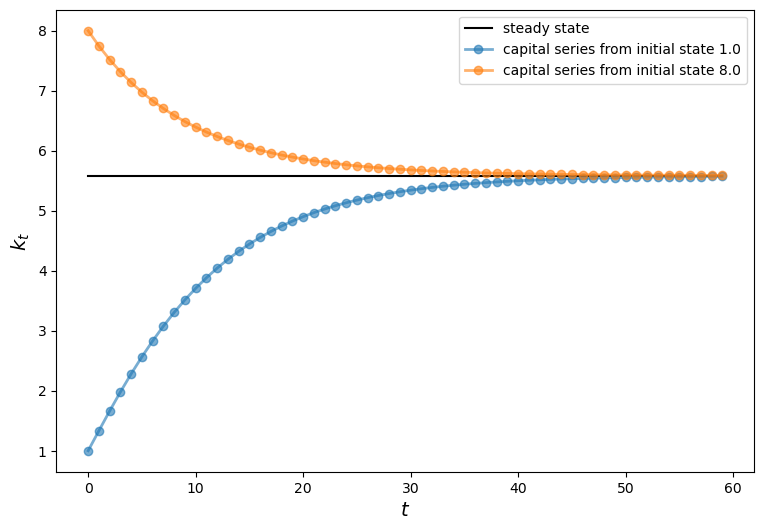

In [15]:
s1 = Solow()
s2 = Solow(k=8.0)

T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

### Example: A Market

Next, let’s write a class for competitive market in which buyers and sellers are both price takers.

The market consists of the following objects:

- A linear demand curve $ Q = a_d - b_d p $  
- A linear supply curve $ Q = a_z + b_z (p - t) $  


Here

- $ p $ is price paid by the buyer,  $ Q $ is quantity and $ t $ is a per-unit tax.  
- Other symbols are demand and supply parameters.  


The class provides methods to compute various values of interest, including competitive equilibrium price and quantity, tax revenue raised, consumer surplus and producer surplus.

Here’s our implementation.

(It uses a function from SciPy called quad for numerical integration—a topic we will say more about later on.)

In [33]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Compute equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

Here’s a sample of usage

In [34]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [35]:
print("consumer surplus = ", m.consumer_surp())

consumer surplus =  33.0625


Here’s a short program that uses this class to plot an inverse demand curve together with inverse
supply curves  with and without taxes

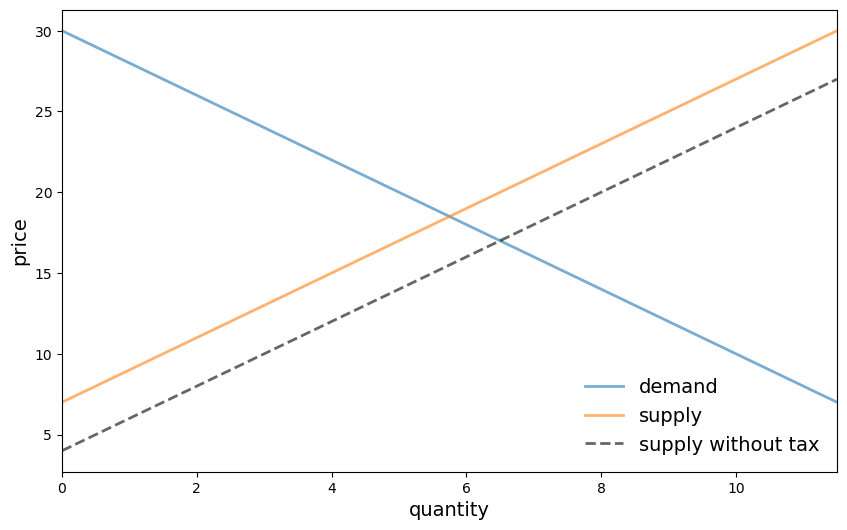

In [36]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

The next program provides a function that

- takes an instance of `Market` as a parameter  
- computes dead weight loss from the imposition of the tax  

In [37]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

Here’s an example of usage

In [38]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)  # Show deadweight loss

1.125

### Example: Chaos

Let’s look at one more example, related to chaotic dynamics in nonlinear systems.

A simple transition rule that can generate erratic time paths is the logistic map


<a id='equation-quadmap2'></a>
$$
x_{t+1} = r x_t(1 - x_t) ,
\quad x_0 \in [0, 1],
\quad r \in [0, 4] \tag{7.2}
$$

Let’s write a class for generating time series from this model.

Here’s one implementation

In [39]:
class Chaos:
  """
  Models the dynamical system :math:`x_{t+1} = r x_t (1 - x_t)`
  """
  def __init__(self, x0, r):
      """
      Initialize with state x0 and parameter r
      """
      self.x, self.r = x0, r

  def update(self):
      "Apply the map to update state."
      self.x =  self.r * self.x *(1 - self.x)

  def generate_sequence(self, n):
      "Generate and return a sequence of length n."
      path = []
      for i in range(n):
          path.append(self.x)
          self.update()
      return path

Here’s an example of usage

In [40]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

This piece of code plots a longer trajectory

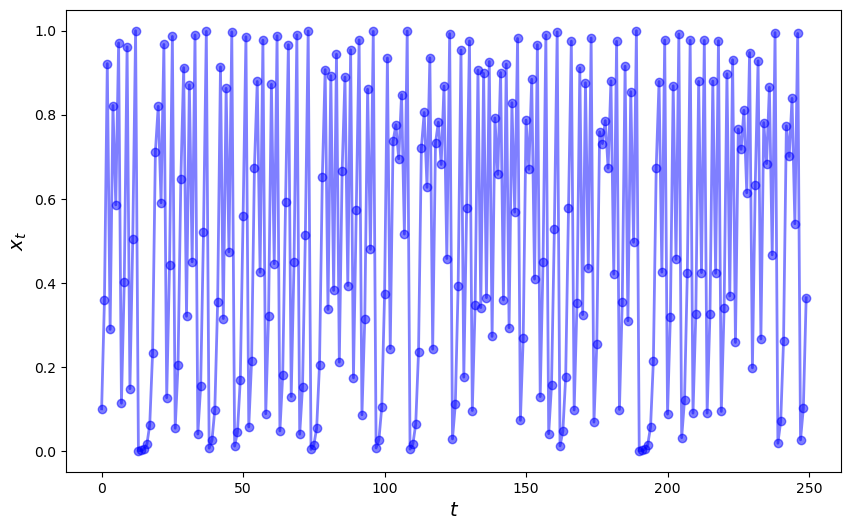

In [41]:
ch = Chaos(0.1, 4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label='$x_t$')
plt.show()

The next piece of code provides a bifurcation diagram

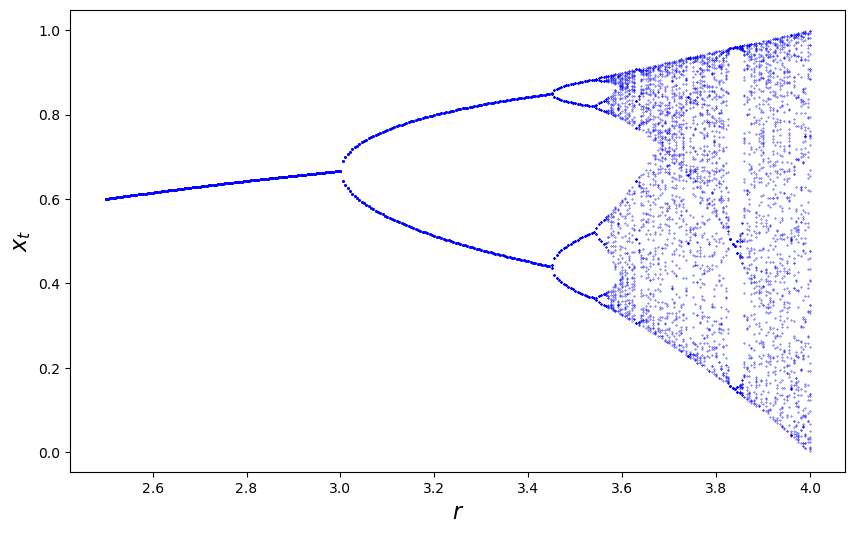

In [42]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel('$r$', fontsize=16)
ax.set_ylabel('$x_t$', fontsize=16)
plt.show()

On the horizontal axis is the parameter $ r $ in [(7.2)](#equation-quadmap2).

The vertical axis is the state space $ [0, 1] $.

For each $ r $ we compute a long time series and then plot the tail (the last 50 points).

The tail of the sequence shows us where the trajectory concentrates after
settling down to some kind of steady state, if a steady state exists.

Whether it settles down, and the character of the steady state to which it does settle down, depend on the value of $ r $.

For $ r $ between about 2.5 and 3, the time series settles into a single fixed point plotted on the vertical axis.

For $ r $ between about 3 and 3.45, the time series settles down to oscillating between the two values plotted on the vertical
axis.

For $ r $ a little bit higher than 3.45, the time series settles down to oscillating among the four values plotted on the vertical axis.

Notice that there is no value of $ r $ that leads to a steady state oscillating among three values.

## Special Methods


<a id='index-5'></a>
Python provides special methods that come in handy.

For example, recall that lists and tuples have a notion of length and that this length can be queried via the `len` function

In [43]:
x = (10, 20)
len(x)

2

If you want to provide a return value for the `len` function when applied to
your user-defined object, use the `__len__` special method

In [44]:
class Foo:

    def __len__(self):
        return 42

Now we get

In [45]:
f = Foo()
len(f)

42


<a id='call-method'></a>
A special method we will use regularly is the `__call__` method.

This method can be used to make your instances callable, just like functions

In [46]:
class Foo:

    def __call__(self, x):
        return x + 42

After running we get

In [47]:
f = Foo()
f(8)  # Exactly equivalent to f.__call__(8)

50

Exercise 1 provides a more useful example.

## Exercises

## Exercise 7.1

The [empirical cumulative distribution function (ecdf)](https://en.wikipedia.org/wiki/Empirical_distribution_function) corresponding to a sample $ \{X_i\}_{i=1}^n $ is defined as


<a id='equation-emdist'></a>
$$
F_n(x) := \frac{1}{n}  \sum_{i=1}^n \mathbf{1}\{X_i \leq x\}
  \qquad (x \in \mathbb{R}) \tag{7.3}
$$

Here $ \mathbf{1}\{X_i \leq x\} $ is an indicator function (one if $ X_i \leq x $ and zero otherwise)
and hence $ F_n(x) $ is the fraction of the sample that falls below $ x $.

The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $ F_n $ converges to the true distribution function $ F $.

Implement $ F_n $ as a class called `ECDF`, where

- A given sample $ \{X_i\}_{i=1}^n $ are the instance data, stored as `self.observations`.  
- The class implements a `__call__` method that returns $ F_n(x) $ for any $ x $.  


Your code should work as follows (modulo randomness)

```python3
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5
```


```python3
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)
```


Aim for clarity, not efficiency.

## Solution to[ Exercise 7.1](https://python-programming.quantecon.org/#oop_ex1)

In [48]:
class ECDF:

    def __init__(self, observations):
        self.observations = observations

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        return counter / len(self.observations)

In [49]:
# == test == #

from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.7
0.495


## Exercise 7.2

In an [earlier exercise](https://python-programming.quantecon.org/python_essentials.html#pyess_ex2), you wrote a function for evaluating polynomials.

This exercise is an extension, where the task is to build a simple class called `Polynomial` for representing and manipulating polynomial functions such as


<a id='equation-polynom'></a>
$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n
    \qquad (x \in \mathbb{R}) \tag{7.4}
$$

The instance data for the class `Polynomial` will be the coefficients (in the case of [(7.4)](#equation-polynom), the numbers $ a_0, \ldots, a_N $).

Provide methods that

1. Evaluate the polynomial [(7.4)](#equation-polynom), returning $ p(x) $ for any $ x $.  
1. Differentiate the polynomial, replacing the original coefficients with those of its derivative $ p' $.  


Avoid using any `import` statements.

## Solution to[ Exercise 7.2](https://python-programming.quantecon.org/#oop_ex2)

In [50]:
class Polynomial:

    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing

            p(x) = a_0 x^0 + ... + a_N x^N,

        where a_i = coefficients[i].
        """
        self.coefficients = coefficients

    def __call__(self, x):
        "Evaluate the polynomial at x."
        y = 0
        for i, a in enumerate(self.coefficients):
            y += a * x**i
        return y

    def differentiate(self):
        "Reset self.coefficients to those of p' instead of p."
        new_coefficients = []
        for i, a in enumerate(self.coefficients):
            new_coefficients.append(i * a)
        # Remove the first element, which is zero
        del new_coefficients[0]
        # And reset coefficients data to new values
        self.coefficients = new_coefficients
        return new_coefficients